# 資料匯入(MNIST)及預處理

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# 第一次執行會下載到 '~/.keras/datasets/'
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 預處理
X_train = X_train.reshape(X_train.shape[0], -1) / 255 
X_test = X_test.reshape(X_test.shape[0], -1) / 255
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


# 複雜的模型設計

In [5]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 註：如果已經設置好GPU，Keras會自動使用GPU建模

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s - loss: 0.3144 - acc: 0.9110 - val_loss: 0.1462 - val_acc: 0.9569
Epoch 2/10
48000/48000 [==============================] - 14s - loss: 0.1156 - acc: 0.9666 - val_loss: 0.1084 - val_acc: 0.9691
Epoch 3/10
48000/48000 [==============================] - 15s - loss: 0.0707 - acc: 0.9783 - val_loss: 0.0861 - val_acc: 0.9753
Epoch 4/10
48000/48000 [==============================] - 15s - loss: 0.0456 - acc: 0.9869 - val_loss: 0.0895 - val_acc: 0.9735
Epoch 5/10
48000/48000 [==============================] - 15s - loss: 0.0341 - acc: 0.9897 - val_loss: 0.0764 - val_acc: 0.9771
Epoch 6/10
48000/48000 [==============================] - 15s - loss: 0.0227 - acc: 0.9935 - val_loss: 0.0752 - val_acc: 0.9791
Epoch 7/10
48000/48000 [==============================] - 14s - loss: 0.0169 - acc: 0.9950 - val_loss: 0.0831 - val_acc: 0.9764
Epoch 8/10
48000/48000 [==============================

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

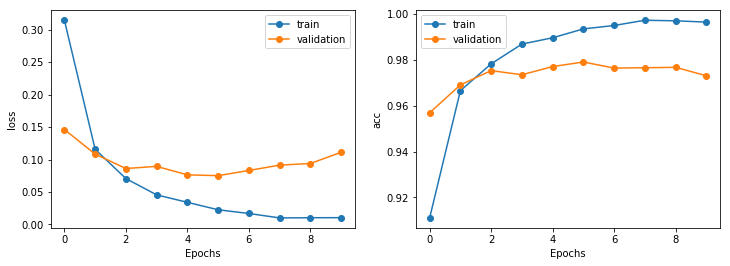

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [9]:
model.evaluate(X_test,y_test)

 9856/10000 [============================>.] - ETA: 0s

[0.097872274125201511, 0.97430000000000005]

# Early Stopping

In [10]:
from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor='val_loss', patience=1) #patience:number of epochs with no improvement after which training will be stopped.

In [11]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1, callbacks=[earlyStopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s - loss: 0.3288 - acc: 0.9086 - val_loss: 0.1511 - val_acc: 0.9565
Epoch 2/10
48000/48000 [==============================] - 15s - loss: 0.1146 - acc: 0.9663 - val_loss: 0.0991 - val_acc: 0.9696
Epoch 3/10
48000/48000 [==============================] - 14s - loss: 0.0697 - acc: 0.9795 - val_loss: 0.0884 - val_acc: 0.9723
Epoch 4/10
48000/48000 [==============================] - 15s - loss: 0.0482 - acc: 0.9862 - val_loss: 0.0819 - val_acc: 0.9746
Epoch 5/10
48000/48000 [==============================] - 14s - loss: 0.0329 - acc: 0.9900 - val_loss: 0.0788 - val_acc: 0.9774
Epoch 6/10
48000/48000 [==============================] - 15s - loss: 0.0239 - acc: 0.9927 - val_loss: 0.0903 - val_acc: 0.9748
Epoch 7/10
48000/48000 [==============================] - 14s - loss: 0.0164 - acc: 0.9956 - val_loss: 0.0868 - val_acc: 0.9765


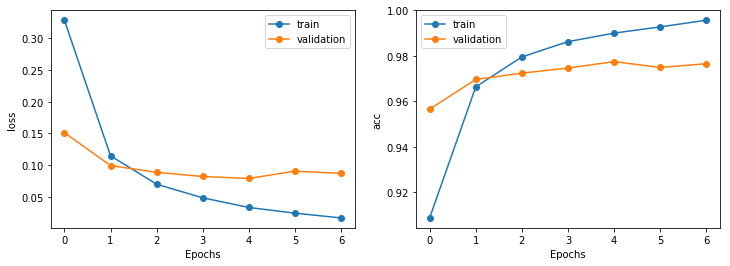

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [13]:
model.evaluate(X_test,y_test)

 9824/10000 [============================>.] - ETA: 0s

[0.076780675405415236, 0.97729999999999995]

# Regularization

In [14]:
from keras import regularizers

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s - loss: 3.9455 - acc: 0.8590 - val_loss: 0.7377 - val_acc: 0.9054
Epoch 2/10
48000/48000 [==============================] - 19s - loss: 0.6987 - acc: 0.9005 - val_loss: 0.6344 - val_acc: 0.9084
Epoch 3/10
48000/48000 [==============================] - 19s - loss: 0.6220 - acc: 0.9096 - val_loss: 0.5642 - val_acc: 0.9229
Epoch 4/10
48000/48000 [==============================] - 19s - loss: 0.5719 - acc: 0.9160 - val_loss: 0.5329 - val_acc: 0.9307
Epoch 5/10
48000/48000 [==============================] - 19s - loss: 0.5339 - acc: 0.9233 - val_loss: 0.5092 - val_acc: 0.9295
Epoch 6/10
48000/48000 [==============================] - 19s - loss: 0.5032 - acc: 0.9289 - val_loss: 0.4831 - val_acc: 0.9368
Epoch 7/10
48000/48000 [==============================] - 19s - loss: 0.4803 - acc: 0.9322 - val_loss: 0.4488 - val_acc: 0.9404
Epoch 8/10
48000/48000 [==============================

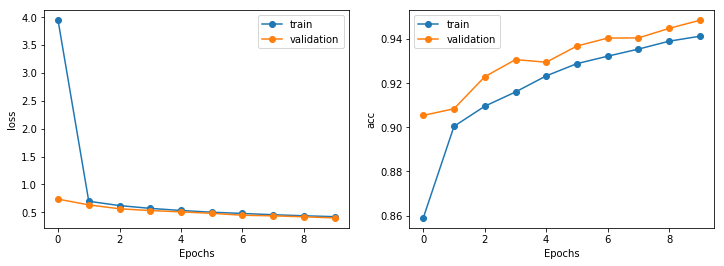

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [17]:
model.evaluate(X_test,y_test,batch_size=100)

10000/10000 [==============================] - 1s     


[0.40335161045193674, 0.94780000269412989]

# Dropout

In [18]:
from keras.layers import Dropout  

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s - loss: 0.3625 - acc: 0.8941 - val_loss: 0.1510 - val_acc: 0.9558
Epoch 2/10
48000/48000 [==============================] - 16s - loss: 0.1413 - acc: 0.9576 - val_loss: 0.1031 - val_acc: 0.9677
Epoch 3/10
48000/48000 [==============================] - 16s - loss: 0.0947 - acc: 0.9716 - val_loss: 0.0868 - val_acc: 0.9728
Epoch 4/10
48000/48000 [==============================] - 16s - loss: 0.0706 - acc: 0.9781 - val_loss: 0.0831 - val_acc: 0.9748
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.0545 - acc: 0.9832 - val_loss: 0.0739 - val_acc: 0.9782
Epoch 6/10
48000/48000 [==============================] - 16s - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0743 - val_acc: 0.9786
Epoch 7/10
48000/48000 [==============================] - 16s - loss: 0.0355 - acc: 0.9889 - val_loss: 0.0685 - val_acc: 0.9804
Epoch 8/10
48000/48000 [==============================

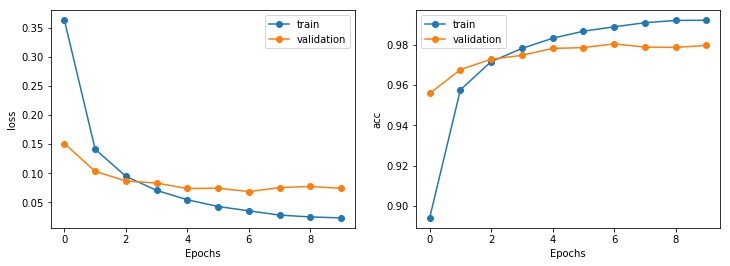

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [21]:
model.evaluate(X_test,y_test)

 9920/10000 [============================>.] - ETA: 0s

[0.061795086426200581, 0.98229999999999995]